
# Natural Language Processing
## Decoding the representation of natural language from fMRI 

Decoding the natural language that represents semantic/narrative content from the neural activation patterns is a topic of interest in the field of cognitive neuroscience. By analyzing the linear relationship between functional MRI (fMRI) of multiple subjects and the corresponding movie annotations ([Vodrahali et al., 2018](https://doi.org/10.1016/j.neuroimage.2017.06.042)) or speech ([Huth et al., 2016](https://doi.org/10.1038/nature17637)), recent studies have shown that semantic or narrative content can be decoded from neural response patterns.  


**Goal**
Decode natural language informaiton from fMRI data using a cross-validated, predictive model

## Getting Started
Make sure you have the necessary software installed and data downloaded.

### Software
This tutorial requires the following Python packages to be installed. 

- matplotlib
- numpy
- scipy
- pandas
- sklearn
- nltk
- nibabel
- nilearn
- nltools
- requests
- datalad

In [1]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [2]:
!pip install nltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.5 MB/s eta 0:00:00


In [3]:
!pip install datalad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00


In [4]:
!pip install datalad-installer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!sudo apt-get install netbase

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  netbase
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 13.1 kB of archives.
After this operation, 44.0 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 netbase all 6.1 [13.1 kB]
Fetched 13.1 kB in 0s (74.4 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package netbase.
(Reading database ... 122518 files and directories currently install

In [6]:
!datalad-installer git-annex -m datalad/packages

2023-05-02T17:56:20+0000 [INFO    ] datalad_installer Writing environment modifications to /tmp/dl-env-uoss7dag.sh
2023-05-02T17:56:20+0000 [INFO    ] datalad_installer Installing git-annex via datalad/packages
2023-05-02T17:56:20+0000 [INFO    ] datalad_installer Version: None
2023-05-02T17:56:20+0000 [INFO    ] datalad_installer Fetching latest version ...
2023-05-02T17:56:20+0000 [INFO    ] datalad_installer Downloading http://datasets.datalad.org/datalad/packages/latest-version
2023-05-02T17:56:20+0000 [INFO    ] datalad_installer Found latest version: 10.20230407
2023-05-02T17:56:20+0000 [INFO    ] datalad_installer Downloading https://datasets.datalad.org/datalad/packages/neurodebian/git-annex-standalone_10.20230407-1~ndall+1_amd64.deb
About to run the following command as an administrator:
    dpkg -i '/tmp/tmptvxbse_f/git-annex-standalone_10.20230407-1~ndall+1_amd64.deb'
Proceed? [y/a/n] y
2023-05-02T17:56:25+0000 [INFO    ] datalad_installer Running: sudo dpkg -i '/tmp/tmptvxb

In [7]:
# Import libraries and configurations.
import re
import csv
import os
import pickle
import glob

# for scientific computing and data visualization 
import numpy as np
import pandas as pd
from scipy import signal
from scipy.stats import zscore
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# for natural language processing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt') # Download package punkt if you don't have

# for machine learning
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics.pairwise import cosine_similarity

# for handling neuroimaging data
import nibabel as nib
from nilearn.plotting import view_img, view_img_on_surf
from nltools.data import Brain_Data
from nltools.external import glover_hrf
from nltools.mask import expand_mask, roi_to_brain

# for downloading data
import requests
import datalad.api as dl

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Data
We will use the **Paranoia** dataset of [Finn et al. (2018)](https://www.nature.com/articles/s41467-018-04387-2). This dataset consists of 22 participants' fMRI data, as they listened to a 22-minute audio-narrated story. Each participant's fMRI data contains three runs. The goal is moment-to-moment decoding of the natural language information from the corresponding fMRI responses.

Change `data_dir` to wherever you have installed the Paranoia datalad repository (e.g. `~/data`). We will initialize a datalad dataset instance and get the files we need.

In [8]:
!git config --global user.email "sashank.ssridhar@gmail.com"
!git config --global user.name "sashanksridhar"

In [9]:
!datalad install https://gin.g-node.org/ljchang/Paranoia

Cloning:   0% 0.00/2.00 [00:00<?, ? candidates/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0% 0.00/23.9k [00:00<?, ? Objects/s]
                                                
Compressing:   0% 0.00/13.1k [00:00<?, ? Objects/s]
Compressing:  25% 3.27k/13.1k [00:00<00:00, 29.3k Objects/s]
Compressing:  57% 7.45k/13.1k [00:00<00:00, 30.1k Objects/s]
                                                            
Receiving:   0% 0.00/23.9k [00:00<?, ? Objects/s]
Receiving:   2% 479/23.9k [00:00<00:11, 2.13k Objects/s]
Receiving:  12% 2.87k/23.9k [00:00<00:02, 9.31k Objects/s]
Receiving:  17% 4.07k/23.9k [00:00<00:02, 9.54k Objects/s]
Receiving:  22% 5.27k/23.9k [00:00<00:02, 8.05k Objects/s]
Receiving:  26% 6.22k/23.9k [00:00<00:02, 7.19k Objects/s]
Receiving:  31% 7.42k/23.9k [00:00<00:02, 7.93k Objects/s]
Receiving:  36% 8.62k/23.9k [00:01<00:01, 8.35k Objects/s]
Receiving:  40% 9.58k/23.9k [00:01<00:01, 7.52k Objects/s]
Rec

In [10]:
data_dir = '/content/Paranoia' # Change this for your computer

# If dataset hasn't been installed, clone from GIN repository
dl.clone(source='https://gin.g-node.org/ljchang/Paranoia', path=data_dir)

# # Initialize dataset
ds = dl.Dataset(data_dir)

result = ds.get(glob.glob(os.path.join(data_dir, 'participants.tsv')))

# # Get Cropped & Denoised Nifti Files
# result = ds.get(glob.glob(os.path.join(data_dir, 'fmriprep', '*', 'func', '*denoise_smooth6mm_task-story*nii.gz')))

#Get Average Time Series within Parcellation
result = ds.get(glob.glob(os.path.join(data_dir, 'fmriprep', '*', 'func', '*_nodeTimeSeries.csv')))

# Get Forced Aligned transcripts
result = ds.get(glob.glob(os.path.join(data_dir, 'stimuli', 'paranoia_story*_transcript.txt')))

INFO:datalad.annex:Start annex operation
INFO:datalad.annex:Finished annex get
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad.annex:Start annex operation


get(ok): participants.tsv (file) [from origin...]


INFO:datalad.annex:Start annex action: {'command': 'get', 'note': 'from origin...', 'input': ['fmriprep/sub-tb3240/func/sub-tb3240_run-2_nodeTimeSeries.csv'], 'key': 'MD5E-s1329429--0c2103cab7210eacefb55679407fba97.csv', 'file': 'fmriprep/sub-tb3240/func/sub-tb3240_run-2_nodeTimeSeries.csv'}
INFO:datalad.annex:23.39%
INFO:datalad.annex:51.73%
INFO:datalad.annex:63.44%
INFO:datalad.annex:88.09%
INFO:datalad.annex:Finished annex action: None
INFO:datalad.annex:fmriprep/sub-tb3240/func/sub-tb3240_run-2_nodeTimeSeries.csv
INFO:datalad.annex:Start annex action: {'command': 'get', 'note': 'from origin...', 'input': ['fmriprep/sub-tb3512/func/sub-tb3512_run-1_nodeTimeSeries.csv'], 'key': 'MD5E-s1544866--5aa559ddf9353fc55ec09b23da466256.csv', 'file': 'fmriprep/sub-tb3512/func/sub-tb3512_run-1_nodeTimeSeries.csv'}
INFO:datalad.annex:10.61%
INFO:datalad.annex:26.51%
INFO:datalad.annex:39.24%
INFO:datalad.annex:55.15%
INFO:datalad.annex:69.47%
INFO:datalad.annex:86.43%
INFO:datalad.annex:Finished

get(ok): fmriprep/sub-tb3240/func/sub-tb3240_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3512/func/sub-tb3512_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3977/func/sub-tb3977_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3920/func/sub-tb3920_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3810/func/sub-tb3810_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb4450/func/sub-tb4450_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb2994/func/sub-tb2994_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3646/func/sub-tb3646_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3858/func/sub-tb3858_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3646/func/sub-tb3646_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3846/func/sub-tb3846_run-3_nodeTimeS

INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:

get(ok): fmriprep/sub-tb3592/func/sub-tb3592_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3858/func/sub-tb3858_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3757/func/sub-tb3757_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3964/func/sub-tb3964_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3964/func/sub-tb3964_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3977/func/sub-tb3977_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3964/func/sub-tb3964_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3132/func/sub-tb3132_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3602/func/sub-tb3602_run-1_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3810/func/sub-tb3810_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3810/func/sub-tb3810_run-1_nodeTimeS

INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars


get(ok): fmriprep/sub-tb3977/func/sub-tb3977_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3920/func/sub-tb3920_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3512/func/sub-tb3512_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3929/func/sub-tb3929_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb4547/func/sub-tb4547_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3784/func/sub-tb3784_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3626/func/sub-tb3626_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3757/func/sub-tb3757_run-3_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3757/func/sub-tb3757_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb3592/func/sub-tb3592_run-2_nodeTimeSeries.csv (file) [from origin...]
get(ok): fmriprep/sub-tb4450/func/sub-tb4450_run-3_nodeTimeS

INFO:datalad.annex:Start annex operation
INFO:datalad.annex:stimuli/paranoia_story3_transcript.txt
INFO:datalad.annex:stimuli/paranoia_story1_transcript.txt
INFO:datalad.annex:Finished annex get
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars
INFO:datalad:Clear progress bars
INFO:datalad:Refresh progress bars


get(ok): stimuli/paranoia_story3_transcript.txt (file) [from origin...]
get(ok): stimuli/paranoia_story1_transcript.txt (file) [from origin...]
get(ok): stimuli/paranoia_story2_transcript.txt (file) [from origin...]
action summary:
  get (ok: 3)


## Functional MRI data
To reduce the fMRI data's dimensionality, we extract the mean time course of the regions of interest (ROIs), which is defined using the whole-brain functional parcellation called the Shen atlas ([Shen et al., 2013](https://www.sciencedirect.com/science/article/abs/pii/S1053811913005818)), which has 268 parcels. Other dimensionality reduction methods (e.g., PCA, ICA, SRM, etc.) can be chosen.

### Parcellation Atlas
Let's visualize the Shen et al., 2013 Parcellation scheme. Here, we download the mask directly from [neurovault](https://neurovault.org/images/395091/) using `nltools` and then plot with `nilearn`.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



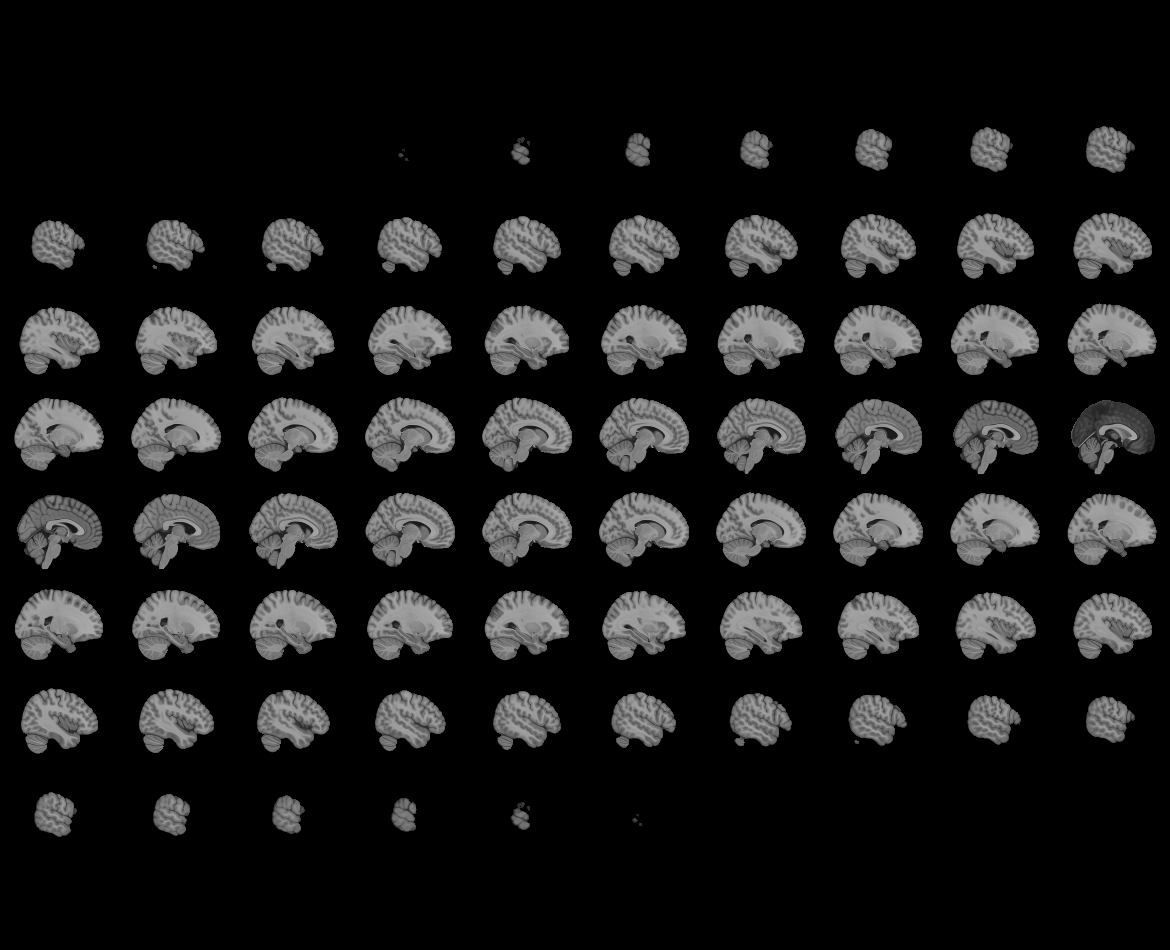
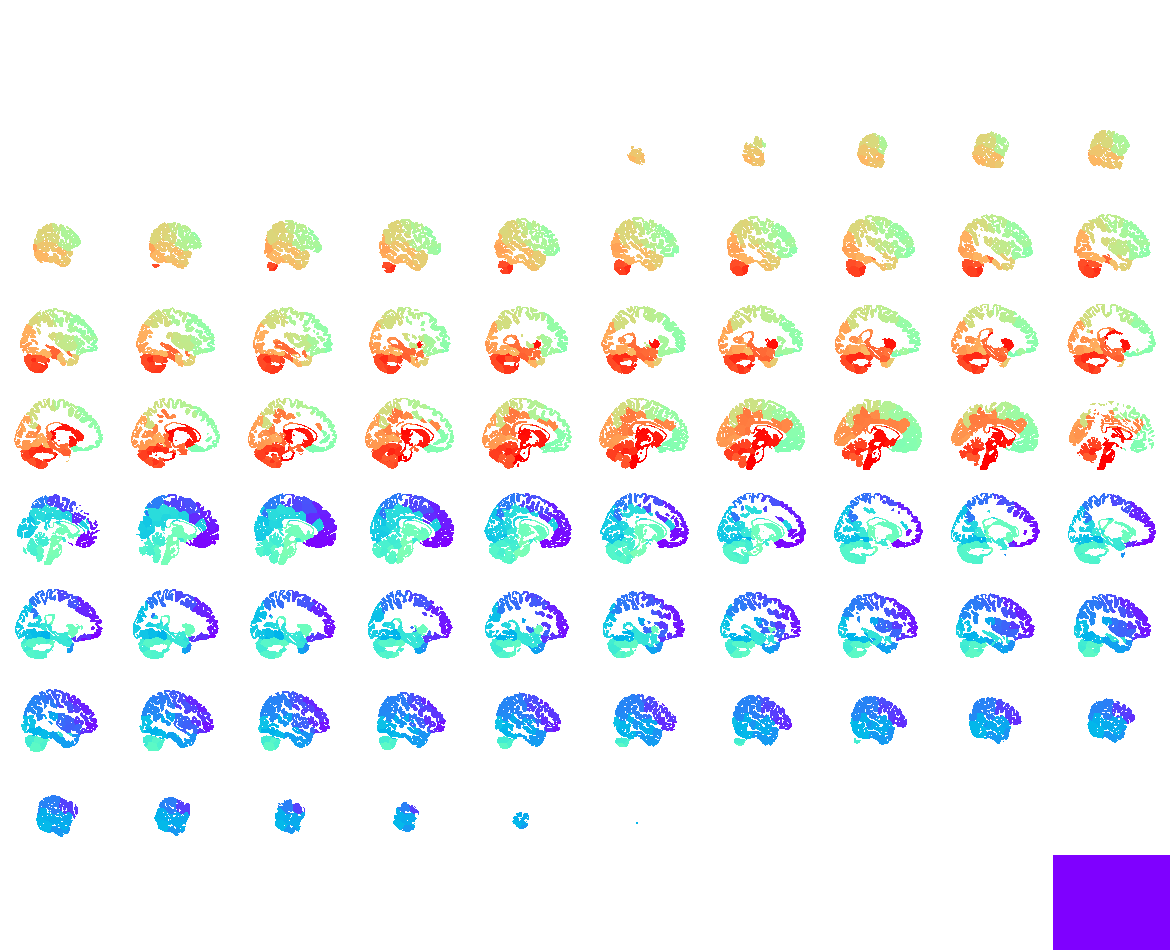

In [11]:
mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')

view_img(mask.to_nifti(), symmetric_cmap=False, cmap='rainbow')

### Mean time course of ROIs
Next, we will extract the mean time course from all voxels in each ROI.

The original fMRI data is 4D `(91, 109, 91, 1310)`, which corresponds to `(x, y, z, time)`. The Shen Atlas has 268 ROIs, so the dimensions of the reduced data should be `(1310, 268)`. 

Next, we'll create node time series for all subjects for all runs. There are 22 subjects, each with 3 runs, so this will take a little while (~45 min). To speed this up, we have already run the code and shared the extracted csv files in the datalad repository. If you would like to run this yourself, make sure you have the correct data downloaded and paste this code into a new cell and run it. 


In [12]:
behav_data = pd.read_csv('Paranoia/participants.tsv', sep='\t')

subj_list = behav_data["participant_id"]

fmri_data = []
for subj in subj_list:
    sub_data = []
    for run in range(1,4):
        sub_data.append(pd.read_csv(os.path.join(data_dir, 'fmriprep', subj, 'func', f'{subj}_run-{run}_nodeTimeSeries.csv')))
    sub_data = pd.concat(sub_data)
    fmri_data.append(sub_data.values)
fmri_data = np.array(fmri_data)

print(fmri_data.shape)

(22, 1310, 268)


We have 22 subjects x 1310 TRs (which is the number of timepoints in across all runs) x 268 parcels.

### Visualize fMRI data (Time points, ROIs)
Your fMRI data should now be a matrix of `(n_samples, n_features)`.

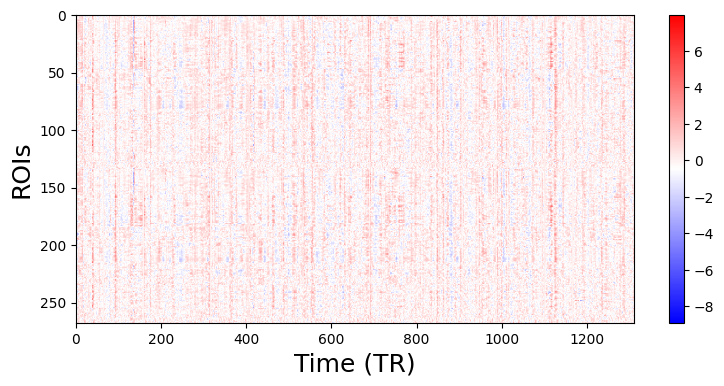

In [13]:
sub_num = 0 # Specify which subject you want to visualize. 
plt.figure(figsize=(9,4))

# Transpose the matrix in order to put Time on the X axis.
plt.imshow(fmri_data[sub_num].T, aspect='auto', cmap='bwr')
plt.xlabel('Time (TR)', fontsize=18)
plt.ylabel('ROIs', fontsize=18)
plt.colorbar()

## Word embedding

Next, we transform natural language information from the Paranoia transcript into vector representations using natural language processing (NLP) to represent the semantic meanings of the story quantitatively. We have performed forced alignment to get the onset of each word using the [Pliers](https://github.com/tyarkoni/pliers) toolbox in the [Automated Annotation](http://naturalistic-data.org/features/notebooks/Pliers_Tutorial.html) tutorial. To represent each word in the Paranoia stimuli, we use a pretrained word embedding model. The purpose is to project each word into a point in a multi-dimensional embedding space, so that it retains its semantic relationship with all other words. 

### GloVe: Pretrained word embedding
The `GloVe: Global Vectors for Word Representation` is a widely used word embedding algorithm ([Pennington, Socher & Manning, 2014](https://nlp.stanford.edu/pubs/glove.pdf)). GloVe provides pretrained word vectors made from a variety of large corpus. You can check more information and download pretrained models [here](https://nlp.stanford.edu/projects/glove/). 

We will use the `glove.6B.100d.txt` model, which contains a feature dimensionality of 100. This file is 862mb to [download](https://nlp.stanford.edu/pubs/glove.pdf). You can download the file, unzip, and then load using the `get_glove_model` function. 

In [14]:
def get_glove_model(url):
    '''Load glove.6B.100d model from URL or File
    
    Args:
        url: (str) either a url to text file, or a path to a local file
        
    Return:
        glove embeddings: (dict) glove embeddings
    '''

    pre_glove_100 = {}
    if 'http:' in url or 'https:' in url:
        page = requests.get(url)

        pre_glove_100 = {}
        split_text = page.text.split('\n')
        for line in split_text:
            split_line = line.split(' ')
            pre_glove_100[split_line[0]] = np.array([float(x) for x in split_line[1:]])
    else:
        with open(url, 'r', encoding='utf-8') as glove_file:
            for line in glove_file:
                split_line = line.split()
                pre_glove_100[split_line[0]] = np.array([float(x) for x in split_line[1:]])
    return pre_glove_100

url = 'http://cosanlab.host.dartmouth.edu/files/glove.6B.100d.txt'

pre_glove_100 = get_glove_model(url)

If a vector representation of each word reflects its semantic information, semantically similar words should have similar vector representations. 

Now we will check what they look like.

shape of the word vector [cheese] is:  (100,)


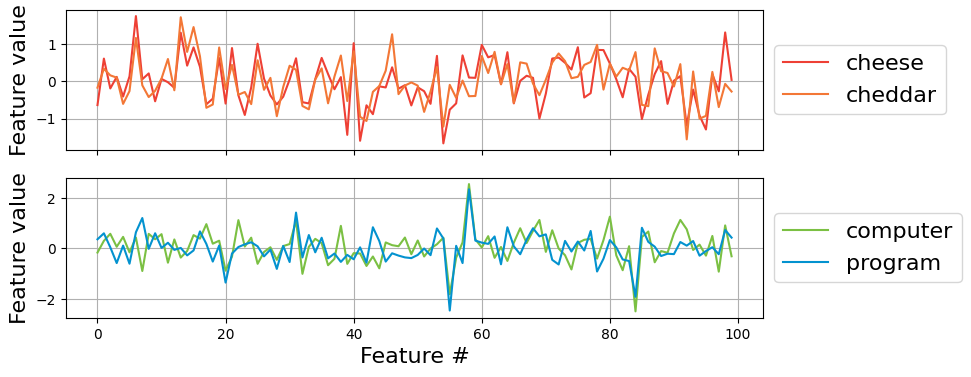

In [15]:
vector_of_cheese = pre_glove_100['cheese']                                                                           
print("shape of the word vector [cheese] is: ", vector_of_cheese.shape)

f,a = plt.subplots(nrows=2, figsize=(9,4), sharex=True)
a[0].plot(pre_glove_100['cheese'].ravel(), c='#ee4035', label='cheese')
a[0].plot(pre_glove_100['cheddar'].ravel(), c='#f37736', label='cheddar')
a[0].legend(bbox_to_anchor=(1, .5), loc='center left', ncol=1, fontsize=16)
a[0].set_ylabel('Feature value', fontsize=16)
a[0].grid()

a[1].plot(pre_glove_100['computer'].ravel(), c='#7bc043', label='computer')
a[1].plot(pre_glove_100['program'].ravel(), c='#0392cf', label='program')
a[1].legend(bbox_to_anchor=(1, .5), loc='center left', ncol=1, fontsize=16)
a[1].set_ylabel('Feature value', fontsize=16)
a[1].set_xlabel('Feature #', fontsize=16)
a[1].grid()

### Preprocessing the Paranoia transcript
We will use transcripts, which have been forced aligned using the [rev.ai](https://www.rev.ai/) API accessed via [Pliers](https://github.com/tyarkoni/pliers) (see the [Automated Annotation](http://naturalistic-data.org/features/notebooks/Pliers_Tutorial.html) Tutorial for more details). 

In this step, we will apply basic data cleaning and preprocessing to the words before projecting them into the embedding space (e.g., removing non-letters, making lowercase).

We will concatenate each run so that the timings match the fMRI data. We need to add 3 seconds on to each onset time to account for the delay in the stimuli presentation at the start of each run. In addition, we will add the length of the previous run to ensure that the onsets are sequential for each story.

In [16]:
def clean_text(text):
    return re.sub(r"[^A-Za-z ']+", '', text).lower()

run_duration = {1:526, 2:452, 3:332}

paranoia_transcript = []
for run in range(1,4):
    run_file = pd.read_csv(os.path.join(data_dir, 'stimuli', f'paranoia_story{run}_transcript.txt'), sep='\t')
    run_file['onset'] = run_file['onset'] + 3
    
    if run == 2:
        run_file['onset'] = run_file['onset'] + run_duration[1]
    if run == 3:
        run_file['onset'] = run_file['onset'] + run_duration[1] + run_duration[2]

    paranoia_transcript.append(run_file)

paranoia_transcript = pd.concat(paranoia_transcript)

paranoia_transcript['clean_text'] = paranoia_transcript.apply(lambda row: clean_text(row['text']), axis=1)

paranoia_transcript.head()

,onset,text,duration,clean_text
0,5.09,The,0.21,the
1,5.30,email,0.36,email
2,5.66,came,0.42,came
3,6.11,late,0.27,late
4,6.38,one,0.24,one


So now, we have 3452 words, along with their onset times and durations.

To map this to the fMRI data, the data matrix should be (1310, 100), which corresponds to (number of TRs, number of features).

You could simply take the average of the embedding vectors of all words in each sentence, then assign this average vector for the duration of the corresponding sentence (from onset to offset).

However, because the participants listened to each word in the audio-narrated story in order, we can adopt a more reasonable method from [Huth et al. (2016)](https://doi.org/10.1038/nature17637), in which they placed each word vector at the onset time of the corresponding word and downsampled the data points to match the fMRI data's low temporal resolution. 

We ignore words that cannot be projected into the GloVe embedding space (e.g., proper nouns).

In [17]:
word_embedding = []
error_keys = []
word_time = []
for row in paranoia_transcript.iterrows():
    
    onset = row[1]['onset']
    word = row[1]['clean_text']
    
    try:   # Check if the word can be projected
        word_embedding.append(pre_glove_100[word])
        word_time.append({'onset':onset, 'word': word})
    except KeyError:  
        split_word = word_tokenize(word)
        print('Trying to split... ', word, '\t-> ', ' + '.join(split_word))
        try:
            word_vector = np.sum([pre_glove_100[w] for w in split_word], axis=0)
            word_embedding.append(word_vector)
            word_time.append({'onset':onset, 'word': word})
        except KeyError:
            error_keys.append(word) # Ignored words

print('------------------Error keys(cannot be embedded)-----------------')
print(set(error_keys))

word_embedding = pd.concat([pd.DataFrame(word_time), pd.DataFrame(word_embedding)], axis=1)

Trying to split...  torson 	->  torson
Trying to split...  torson 	->  torson
Trying to split...  carmen's 	->  carmen + 's
Trying to split...  didn't 	->  did + n't
Trying to split...  wasn't 	->  was + n't
Trying to split...  torson 	->  torson
Trying to split...  torson 	->  torson
Trying to split...  united states 	->  united + states
Trying to split...  torson 	->  torson
Trying to split...  carmen's 	->  carmen + 's
Trying to split...  carmen's 	->  carmen + 's
Trying to split...  flipflops 	->  flipflops
Trying to split...  i'm 	->  i + 'm
Trying to split...  batched 	->  batched
Trying to split...  she'd 	->  she + 'd
Trying to split...  didn't 	->  did + n't
Trying to split...  that's 	->  that + 's
Trying to split...  torson 	->  torson
Trying to split...  wellstocked 	->  wellstocked
Trying to split...  tarson 	->  tarson
Trying to split...  that's 	->  that + 's
Trying to split...  carmen's 	->  carmen + 's
Trying to split...  didn't 	->  did + n't
Trying to split...  carme

### Resampling the word vectors
We now have 3451 word vectors in an embedding dimension of 100. Let us visualize the process of resampling using the first 100 words on the first feature dimension.

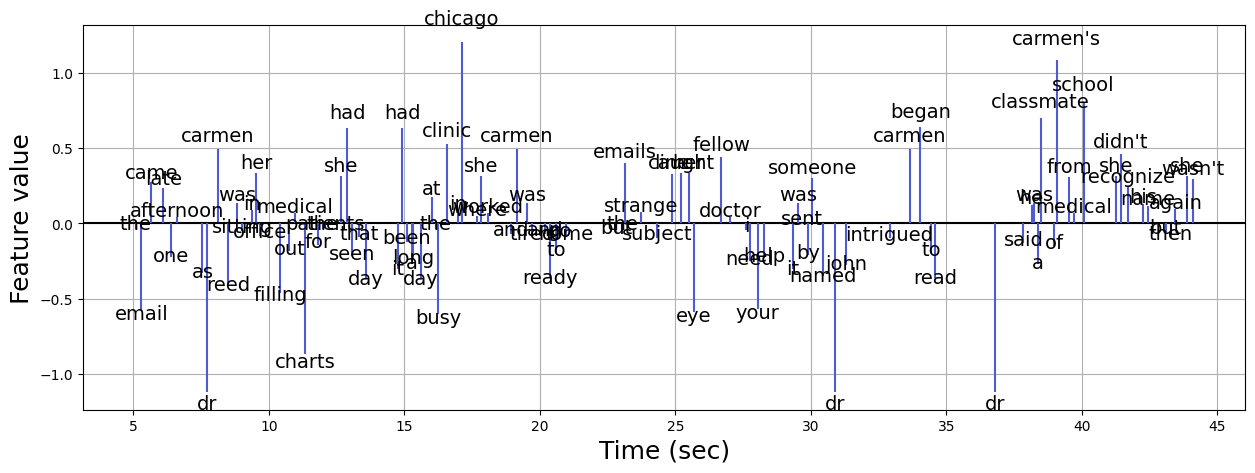

In [18]:
n_words = 100   # first 100 words
feature = 0     # first feature

plt.figure(figsize=(15,5))
plt.axhline(0, c='k')
plt.vlines(word_embedding['onset'][:n_words], [0], 
           word_embedding.iloc[:n_words, feature + 2], color='#4f5bd5', label='word vectors')
# The blue peak represents each word

for i in range(n_words):
    plt.text(word_embedding['onset'][i], 1.1*word_embedding.iloc[i, feature+2], 
             s=word_embedding['word'][i], ha='center', fontsize=14)

plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Feature value', fontsize=18)
plt.grid()

Next, we need to downsample the word vector to the scale of the fMRI data. Here, we use a linear interpolation function. The red line represents the downsampled signal. 

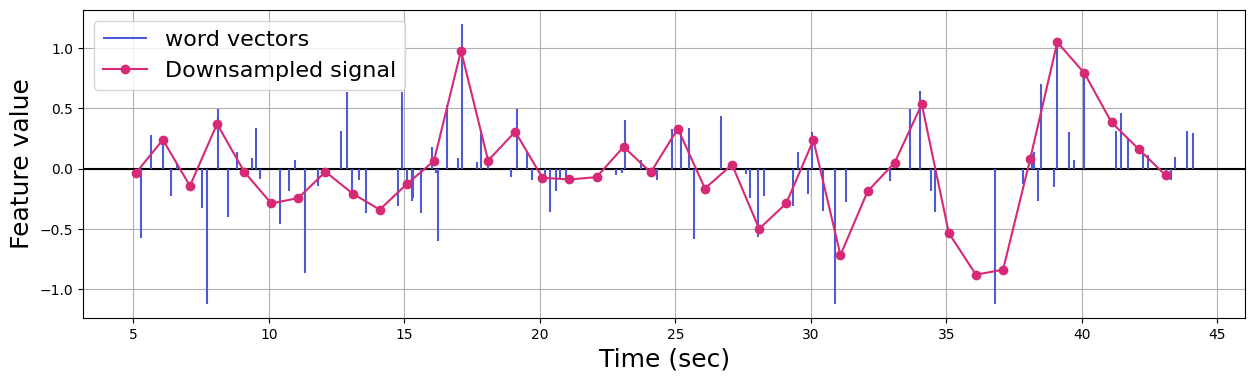

In [19]:
plt.figure(figsize=(15,4))
plt.axhline(0, c='k')
plt.vlines(word_embedding['onset'][:n_words], [0], 
           word_embedding.iloc[:n_words, feature+2], color='#4f5bd5', label='word vectors')

# Linear interpolation
linear_downsample = interp1d(word_embedding['onset'][:n_words], 
                             word_embedding.iloc[:n_words, feature+2], kind='linear')

TR_time = np.arange(np.min(word_embedding['onset'][:n_words]), np.max(word_embedding['onset'][:n_words])) # Specify the number of time points
downsampled_vector = linear_downsample(TR_time)

plt.plot(TR_time, downsampled_vector, 'o-',color='#d62976', label='Downsampled signal')

plt.legend(loc='upper left', fontsize=16)
plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Feature value', fontsize=18)
plt.grid()

We convolve this downsampled signal with the hemodynamic response function (HRF) to obtain temporally lagged fMRI responses. We will be using the Glover double gamma HRF.

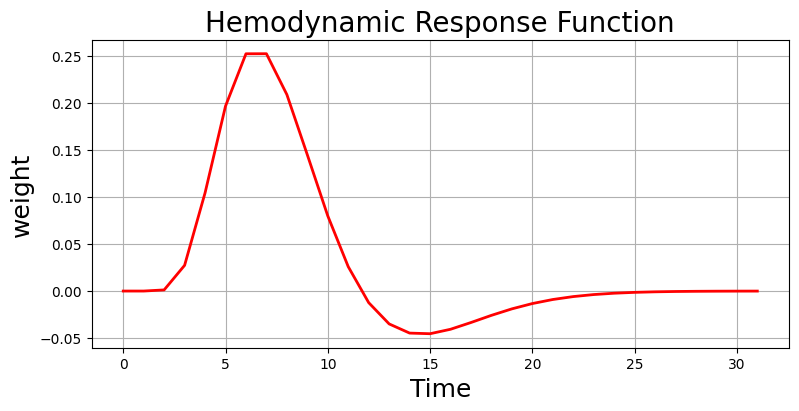

In [20]:
hrf_weight = glover_hrf(1, oversampling=1)

plt.figure(figsize=(9,4))
plt.plot(hrf_weight, 'r-', linewidth=2)
plt.ylabel('weight', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=20)
plt.grid()

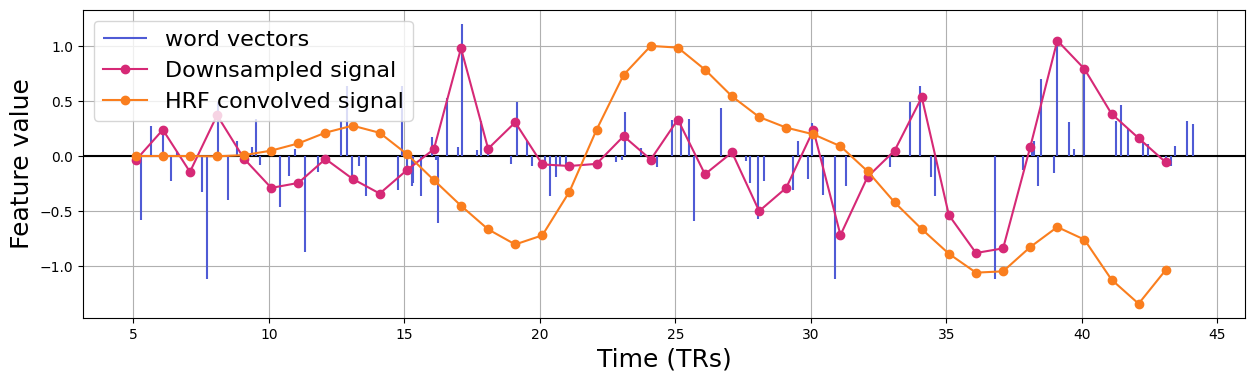

In [21]:
plt.figure(figsize=(15,4))
plt.axhline(0, c='k')
plt.vlines(word_embedding['onset'][:n_words], [0], 
           word_embedding.iloc[:n_words, feature+2], color='#4f5bd5', label='word vectors')

# Linear interpolation
linear_downsample = interp1d(word_embedding['onset'][:n_words], 
                             word_embedding.iloc[:n_words, feature+2], kind='linear')

TR_time = np.arange(np.min(word_embedding['onset'][:n_words]), np.max(word_embedding['onset'][:n_words])) # Specify the number of time points
downsampled_vector = linear_downsample(TR_time)

plt.plot(TR_time, downsampled_vector, 'o-',color='#d62976', label='Downsampled signal')

# Convolve HRF
convolved = np.convolve(downsampled_vector, hrf_weight, mode='full')[:len(downsampled_vector)]
plt.plot(TR_time, convolved/np.max(convolved), 'o-',color='#fa7e1e', label='HRF convolved signal')

plt.legend(loc='upper left', fontsize=16)
plt.xlabel('Time (TRs)', fontsize=18)
plt.ylabel('Feature value', fontsize=18)
plt.grid()


Apply the steps above to all features in the embedding space.

In [22]:
def downsample_embeddings(word_embeddings, kind='linear', convolve_hrf=True):
    '''Downsample word embeddings dataframe to TR and convolve with HRF'''
    
    word_time = word_embeddings['onset']
    embeddings = word_embeddings.iloc[:, 2:]
    linear_downsample = interp1d(word_time, embeddings, kind=kind, axis=0)
    TR_time = np.arange(np.min(word_time), np.max(word_time), 1) # Specify the number of time points
    downsampled_vector = linear_downsample(TR_time)
    downsampled_vector = np.nan_to_num(downsampled_vector, nan=0) # Replace NaNs with zeros for convolution
    downsampled_vector = np.concatenate([np.zeros((5, n_feature)), downsampled_vector, np.zeros((2, 100))], axis=0) # Pad beginning and end with zeros

    if convolve_hrf:
        return np.array([np.convolve(x, hrf_weight)[:len(x)] for x in downsampled_vector.T]).T
    else:
        return downsampled_vector
    
n_TR = 1310
n_feature = 100

paranoia_embedding = downsample_embeddings(word_embedding)